In [25]:
#Willem Master's Thesis

import pypsa
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use ("bmh")
%matplotlib inline
import warnings
import cartopy.crs as ccrs

In [12]:
n = pypsa.Network(r"C:\\Users\\Willem\\pypsa-eur\\networks_redispatch\\solved\\elec_s300_200_ec_lcopt_1H.nc")

C:\Users\Willem\.conda\envs\pypsa-eur\lib\site-packages\pypsa\io.py:769: FutureWarning:

Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead

C:\Users\Willem\.conda\envs\pypsa-eur\lib\site-packages\pypsa\io.py:771: FutureWarning:

Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead

INFO:pypsa.io:Imported network elec_s300_200_ec_lcopt_1H.nc has buses, carriers, generators, lines, links, loads, storage_units


(<matplotlib.collections.PatchCollection at 0x14f11d0ef40>,
 <matplotlib.collections.LineCollection at 0x14f11d1e7f0>)

C:\Users\Willem\.conda\envs\pypsa-eur\lib\site-packages\cartopy\mpl\geoaxes.py:387: MatplotlibDeprecationWarning:


The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.



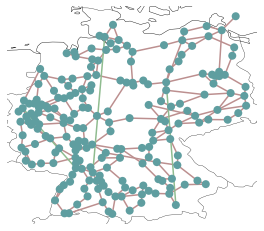

In [13]:
n.plot()

In [14]:
for c in n.iterate_components(list(n.components.keys())[2:]):
    print("{} has {} entries".format(c.name,len(c.df)))

Bus has 200 entries
Carrier has 15 entries
Line has 289 entries
LineType has 31 entries
TransformerType has 14 entries
Link has 3 entries
Load has 195 entries
Generator has 767 entries
StorageUnit has 21 entries


In [6]:
len(n.snapshots)
df_snapshots = pd.DataFrame(n.snapshots)
print(len(df_snapshots.index))

8760


### Time independent data

In [15]:
df_lines = n.lines
df_lines

,bus0,bus1,num_parallel,length,type,s_max_pu,s_nom,capital_cost,s_nom_extendable,s_nom_min,...,g,s_nom_max,terrain_factor,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu
name,,,,,,,,,,,,,,,,,,,,,
1,DE0 0,DE0 138,2.000004,12.513064,Al/St 240/40 4-bundle 380.0,0.7,3396.212108,476.690988,True,3396.205223,...,0.0,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
2,DE0 0,DE0 165,2.000055,11.074566,Al/St 240/40 4-bundle 380.0,0.7,3396.299300,421.986300,True,3396.205223,...,0.0,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
3,DE0 1,DE0 24,3.000005,25.319648,Al/St 240/40 4-bundle 380.0,0.7,5094.315799,964.660233,True,5094.307835,...,0.0,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
4,DE0 1,DE0 59,5.000010,18.518057,Al/St 240/40 4-bundle 380.0,0.7,8490.530551,705.522762,True,8490.513059,...,0.0,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
5,DE0 10,DE0 126,4.000018,27.070721,Al/St 240/40 4-bundle 380.0,0.7,6792.440501,1031.572770,True,6792.410447,...,0.0,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,DE0 7,DE0 86,3.005585,60.216029,Al/St 240/40 4-bundle 380.0,0.7,5103.792470,2294.025881,True,5103.715606,...,0.0,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
286,DE0 70,DE0 88,2.000010,58.347025,Al/St 240/40 4-bundle 380.0,0.7,3396.221941,2223.109822,True,3396.205223,...,0.0,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
287,DE0 74,DE0 86,3.000040,60.613145,Al/St 240/40 4-bundle 380.0,0.7,5094.374984,2309.050842,True,5094.307835,...,0.0,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0


In [19]:
n.lines_t.p0


name,1,10,100,101,102,103,104,105,106,107,...,90,91,92,93,94,95,96,97,98,99
name,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,-526.009642,205.411059,-355.096269,62.676141,307.037130,134.639864,-734.774865,460.060414,157.647813,-298.422704,...,1971.891803,-111.831436,-427.182384,604.759749,-86.102759,-18.668723,-115.390638,-1320.333416,1146.758736,-199.228073
2018-01-01 01:00:00,-517.647642,118.095244,-351.580037,36.325583,332.289309,134.986911,-727.626712,456.744315,90.149549,-226.724527,...,1987.293059,-14.576450,-96.989762,540.564246,28.632166,-288.527974,46.830672,-1307.269686,1138.899668,-196.015002
2018-01-01 02:00:00,-514.600626,103.599227,-356.376028,14.671513,362.656336,137.828513,-734.822137,462.840191,76.601508,-211.425766,...,1991.357878,9.534385,-14.702318,521.980249,56.290865,-356.151654,89.864027,-1309.056873,1142.856494,-197.620880
2018-01-01 03:00:00,-514.239513,104.634021,-357.677774,10.907087,368.439551,138.455682,-736.764994,464.380748,76.710377,-211.308467,...,1991.338164,10.365367,-11.765917,521.042084,56.878836,-358.242698,91.784293,-1310.312322,1144.392265,-198.160216
2018-01-01 04:00:00,-512.807321,106.653420,-362.071897,-2.221641,388.806457,140.646358,-743.497721,469.711808,76.270298,-210.075397,...,1991.770743,14.451620,2.479463,516.819914,60.255703,-368.502969,100.119891,-1314.215887,1149.278538,-199.955336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,-495.845785,596.270137,-581.998804,155.740313,499.903073,144.463701,-783.880982,476.298370,164.964577,-328.899671,...,1841.990473,-196.529178,-726.511062,642.077506,5.371894,789.778059,-866.705195,-1690.332424,1487.325399,-299.076809
2018-12-31 20:00:00,-513.282845,459.023872,-566.201822,152.164100,485.982915,139.194183,-754.706305,457.641350,123.444053,-282.104629,...,1864.651402,-205.625000,-753.972596,859.149199,-51.257608,895.643242,-907.177343,-1710.497924,1514.027512,-290.165319
2018-12-31 21:00:00,-518.131469,338.056052,-559.188149,148.916102,480.510483,137.680861,-745.691794,451.822935,126.106014,-283.075351,...,1869.820270,-211.068122,-771.290099,872.132822,-62.529684,912.447141,-911.511555,-1716.867066,1522.492777,-286.300005


In [9]:
df_loads = n.loads
df_loads 

,bus,type,p_set,q_set,sign
name,,,,,
DE0 0,DE0 0,,0.0,0.0,-1.0
DE0 1,DE0 1,,0.0,0.0,-1.0
DE0 10,DE0 10,,0.0,0.0,-1.0
DE0 100,DE0 100,,0.0,0.0,-1.0
DE0 101,DE0 101,,0.0,0.0,-1.0
...,...,...,...,...,...
DE0 95,DE0 95,,0.0,0.0,-1.0
DE0 96,DE0 96,,0.0,0.0,-1.0
DE0 97,DE0 97,,0.0,0.0,-1.0


### Time dependent data

,DE0 0,DE0 1,DE0 10,DE0 100,DE0 101,DE0 102,DE0 103,DE0 104,DE0 105,DE0 106,...,DE0 90,DE0 91,DE0 92,DE0 93,DE0 94,DE0 95,DE0 96,DE0 97,DE0 98,DE0 99
name,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,148.006324,81.911556,128.960851,109.542970,59.169582,546.030785,82.135858,230.825042,289.913482,266.404395,...,254.910358,154.594048,157.243631,114.489255,311.619552,178.867637,622.734523,170.552198,130.008104,279.119384
2018-01-01 01:00:00,143.590785,79.467852,125.113504,106.274926,57.404350,529.740806,79.685463,223.938735,281.264364,258.456634,...,247.305504,149.981975,152.552511,111.073646,302.322867,173.531399,604.156206,165.464039,126.129514,270.792291
2018-01-01 02:00:00,141.750162,78.449191,123.509732,104.912637,56.668510,522.950305,78.664012,221.068169,277.658967,255.143599,...,244.135410,148.059426,150.597012,109.649845,298.447531,171.306981,596.411810,163.343032,124.512719,267.321131
2018-01-01 03:00:00,141.512377,78.317593,123.302546,104.736647,56.573449,522.073061,78.532054,220.697329,277.193196,254.715598,...,243.725875,147.811058,150.344387,109.465908,297.946888,171.019615,595.411334,163.069026,124.303850,266.872702
2018-01-01 04:00:00,140.678661,77.856187,122.576112,104.119593,56.240148,518.997280,78.069384,219.397096,275.560119,253.214947,...,242.289970,146.940232,149.458636,108.820992,296.191541,170.012057,591.903482,162.108309,123.571517,265.300428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,172.354672,95.386731,150.176050,127.563756,68.903501,635.857675,95.647933,268.797801,337.606812,310.230273,...,296.845365,180.026136,183.111598,133.323749,362.883722,208.292944,725.179856,198.609542,151.395586,325.036990
2018-12-31 20:00:00,166.809400,92.317796,145.344344,123.459570,66.686627,615.399838,92.570594,260.149605,326.744782,300.249045,...,287.294778,174.234045,177.220236,129.034243,351.208443,201.591408,701.848201,192.219556,146.524643,314.579376
2018-12-31 21:00:00,165.031354,91.333766,143.795097,122.143596,65.975804,608.840199,91.583870,257.376631,323.261960,297.048645,...,284.232459,172.376858,175.331219,127.658848,347.464859,199.442615,694.367096,190.170659,144.962815,311.226227


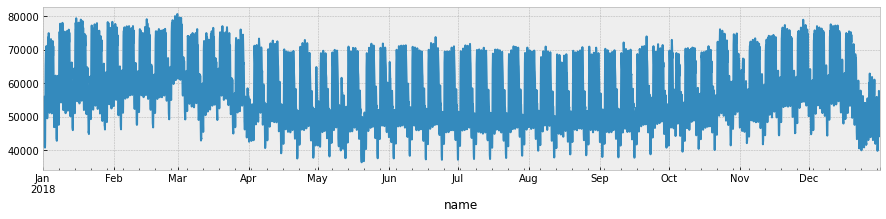

In [20]:
df_loads = n.loads_t.p_set
df_loads.sum(axis=1).plot(figsize=(15,3))
df_loads

In [22]:
df_generators = n.generators_t.p_max_pu
df_generators

,DE0 0 onwind,DE0 0 solar,DE0 1 onwind,DE0 1 solar,DE0 10 onwind,DE0 10 solar,DE0 11 onwind,DE0 11 solar,DE0 12 offwind-ac,DE0 12 offwind-dc,...,DE0 5 onwind,DE0 5 solar,DE0 6 onwind,DE0 6 solar,DE0 7 onwind,DE0 7 solar,DE0 8 onwind,DE0 8 solar,DE0 9 onwind,DE0 9 solar
name,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,0.195183,0.0,0.009740,0.0,0.020946,0.0,0.000000,0.0,0.711571,0.911241,...,0.000873,0.0,0.000000,0.0,0.132409,0.0,0.052265,0.0,0.158946,0.0
2013-03-01 01:00:00,0.239868,0.0,0.011966,0.0,0.030520,0.0,0.000000,0.0,0.675452,0.966180,...,0.002607,0.0,0.000000,0.0,0.136726,0.0,0.025214,0.0,0.173086,0.0
2013-03-01 02:00:00,0.259533,0.0,0.008214,0.0,0.035261,0.0,0.000000,0.0,0.573911,0.983395,...,0.006329,0.0,0.000000,0.0,0.137787,0.0,0.027012,0.0,0.183292,0.0
2013-03-01 03:00:00,0.265293,0.0,0.007426,0.0,0.039259,0.0,0.000000,0.0,0.494766,0.981126,...,0.003140,0.0,0.000000,0.0,0.139998,0.0,0.034569,0.0,0.181164,0.0
2013-03-01 04:00:00,0.273712,0.0,0.006960,0.0,0.048248,0.0,0.000000,0.0,0.457388,0.981113,...,0.000000,0.0,0.000000,0.0,0.128601,0.0,0.043380,0.0,0.162583,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-31 19:00:00,0.096984,0.0,0.057894,0.0,0.072323,0.0,0.059876,0.0,0.040533,0.180015,...,0.056730,0.0,0.072913,0.0,0.089099,0.0,0.096857,0.0,0.090895,0.0
2013-03-31 20:00:00,0.089291,0.0,0.038084,0.0,0.097161,0.0,0.061206,0.0,0.076412,0.191612,...,0.071034,0.0,0.076287,0.0,0.076957,0.0,0.124876,0.0,0.088181,0.0
2013-03-31 21:00:00,0.074778,0.0,0.020768,0.0,0.108344,0.0,0.058532,0.0,0.118002,0.171223,...,0.092321,0.0,0.067035,0.0,0.068716,0.0,0.144720,0.0,0.085554,0.0


In [23]:
df_lines_t = n.lines_t.p0.abs().mean(axis=0).sort_index()
df_lines_t 

Series([], dtype: float64)

Plotting networks

In [24]:
import cartopy.crs as ccrs

In [21]:
loading  = (n.lines_t.p0.abs().mean().sort_index() / (n.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)
loading

name
1      0.105058
10     0.162822
100    0.290832
101    0.067817
102    0.240252
         ...   
95     0.405575
96     0.409149
97     0.509834
98     0.444483
99     0.309646
Length: 289, dtype: float64

(6.022464637500005, 14.861858112500002, 47.27719315229955, 54.95651404036669)

C:\Users\Willem\.conda\envs\pypsa-eur\lib\site-packages\cartopy\mpl\geoaxes.py:387: MatplotlibDeprecationWarning:


The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.



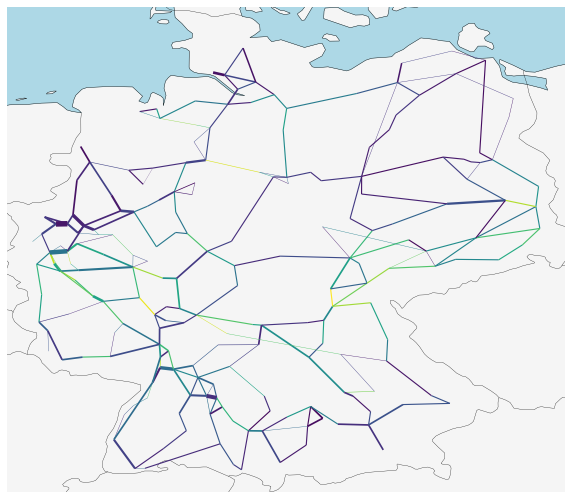

In [26]:
fig,ax = plt.subplots(figsize = (10,10),
                      subplot_kw = {"projection": ccrs.PlateCarree()}
                     )

n.plot(ax=ax,
       bus_colors ="gray",
       branch_components = ["Line"],
       line_widths = n.lines.s_nom_opt/3e3,
       line_colors = loading,
       line_cmap=plt.cm.viridis,
       color_geomap = True,
       bus_sizes = 0)

ax.axis("on")